In [1]:
import tensorflow as tf
import math
import numpy as np

sess = tf.InteractiveSession()

In [12]:
# make some fake data - dimensions are num_channels x height x width (grayscale has num_channels = 1)
num_channels = 1
image = np.random.randint(10, size=[num_channels,10,10]) + np.eye(10)*10

In [13]:
print(type(image))
print(image.shape)
print(image)

<class 'numpy.ndarray'>
(1, 10, 10)
[[[ 11.   3.   8.   4.   3.   1.   3.   7.   1.   2.]
  [  7.  12.   7.   8.   0.   6.   6.   9.   0.   7.]
  [  2.   8.  12.   7.   1.   5.   7.   4.   9.   8.]
  [  6.   6.   6.  12.   0.   9.   3.   9.   8.   1.]
  [  4.   0.   7.   7.  16.   5.   5.   5.   5.   1.]
  [  9.   8.   3.   9.   2.  15.   6.   2.   8.   4.]
  [  2.   2.   2.   4.   3.   7.  12.   8.   9.   4.]
  [  5.   9.   5.   8.   0.   1.   9.  13.   0.   1.]
  [  8.   1.   5.   2.   1.   5.   5.   1.  12.   0.]
  [  0.   2.   9.   3.   0.   0.   8.   7.   8.  18.]]]


In [14]:
#tensorflow placeholder
x = tf.placeholder("float", [None, 10, 10])
x_im = tf.reshape(x, [-1, 10, 10, num_channels]) # last dim is num_channels

In [15]:
# window size to use
winx = 3
winy = 3

In [16]:
# how many features to compute on the window
num_filters = 2

In [18]:
# weight shape should match window size
W1 = tf.Variable(tf.truncated_normal([winx, winy, num_channels, num_filters], stddev=1./math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_filters]))

In [20]:
# 3x3 convolution. pad with zeros on edges
xw = tf.nn.conv2d(x_im, W1, strides=[1,1,1,1], padding='SAME')
# sends negative to 0; positive stays the same
h1 = tf.nn.relu(xw + b1)

In [21]:
# initialize
sess.run(tf.initialize_all_variables())

In [22]:
H = h1.eval(feed_dict = {x:image})

In [23]:
import matplotlib.pyplot as plt
plt.ion()

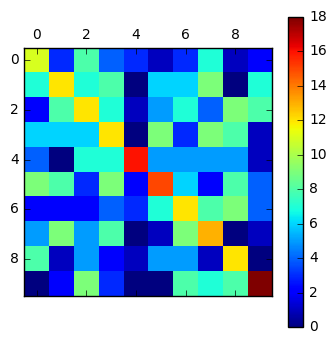

In [24]:
plt.matshow(image[0])
plt.colorbar()

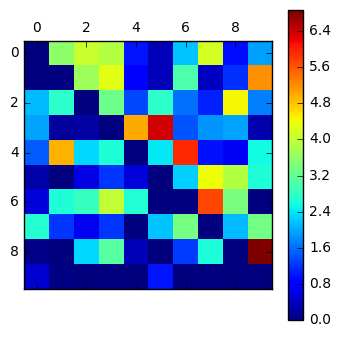

In [25]:
# conv channel 1
plt.matshow(H[0,:,:,0])
plt.colorbar()

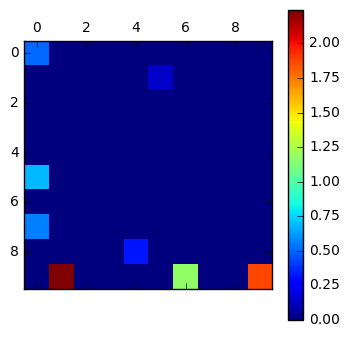

In [26]:
# conv channel 2
plt.matshow(H[0,:,:,1])
plt.colorbar()